<a href="https://colab.research.google.com/github/yashgandhijee2018/ML-Project/blob/main/CNN%20Model%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing Libraries and Importing Dataset


In [2]:
#importing necessary libraries
import os
import keras
import matplotlib
import cv2
import numpy as np
import skimage.io as io
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle

from keras.layers import *
from keras.utils import *
from keras.optimizers import Adam
from keras.models import *

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import model_selection
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score



Reading the data from the disk

In [3]:
# reading data from the disk storage
data= pd.read_csv(r'/content/drive/My Drive/devanagari-character-set.csv')
data.shape
size=data.shape[0]

# shape of the data is 92000 images
# and each image is 32x32 with 28 pixels of the region representing the actual text
# and 4 pixels as padding

#creating a temp type array of our dataset
array=data.values
#X is for input values and Y is for output given on that input attributes
X=array[:,0:1024].astype(float)
Y=array[:,1024]

Pre-processing for Y values

In [4]:
#collecting the digit value from Y[i]
i=0
Y_changed=np.ndarray(Y.shape)
for name in Y:
    x = name.split('_')
    
    if(x[0]=='character'):
        Y_changed[i]=int(x[1])
    elif x[0]=='digit':
        Y_changed[i]=(37 + int(x[1]))
    i=i+1
    
# copy the contents of the array to our original array
Y=Y_changed

#removing the extra elements after memory allocation for numpy array
Y=Y[0:size].copy()
print("The processed Y shape is "+str(Y.shape))

The processed Y shape is (92000,)


Train and Test Split

In [5]:
#size of the testing data
split_size=0.20
#seed value for keeping same randomness in training and testing dataset
seed=6
#splitting of the data
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=split_size,random_state=seed)

Reshaping the data

In [6]:
# reshaping the data in order to convert the given 1D array of an image to actual grid representaion
X_train = X_train.reshape((size*4)//5,32,32,1)
print(X_train.shape)
Y_train = Y_train.reshape((size*4)//5,1)
print(Y_train.shape)
X_test = X_test.reshape(size//5,32,32,1)
print(X_test.shape)
Y_test = Y_test.reshape(size//5,1)
print(Y_test.shape)

(73600, 32, 32, 1)
(73600, 1)
(18400, 32, 32, 1)
(18400, 1)


Creating a reference dictionary

In [7]:
# a reference array for final classification of data
# reference = {1: 'ka', 2: 'kha', 3: 'ga', 4: 'gha', 5: 'kna', 6: 'cha', 7: 'chha', 8: 'ja', 9: 'jha', 10: 'yna', 11: 'taamatar', 12: 'thaa', 13: 'daa', 14: 'dhaa', 15: 'adna', 16: 'tabala', 17: 'tha', 18: 'da', 19: 'dha', 20: 'na', 21: 'pa', 22: 'pha', 23: 'ba', 24: 'bha', 25: 'ma', 26: 'yaw', 27: 'ra', 28: 'la', 29: 'waw', 30: 'motosaw', 31: 'petchiryakha', 32: 'patalosaw', 33: 'ha', 34: 'chhya', 35: 'tra', 36: 'gya', 37: 0, 38: 1, 39: 2, 40: 3, 41: 4, 42: 5, 43: 6, 44: 7, 45: 8, 46: 9}

reference = {1: 'क', 2: 'ख', 3: 'ग', 4: 'घ', 5: 'ङ', 6: 'च', 7: 'छ', 8: 'ज', 9: 'झ', 10: 'ञ', 11: 'ट', 12: 'ठ', 13: 'ड', 14: 'ढ', 15: 'ण', 16: 'त', 17: 'थ', 18: 'द', 19: 'ध', 20: 'न', 21: 'प', 22: 'फ', 23: 'ब', 24: 'भ', 25: 'म', 26: 'य', 27: 'र', 28: 'ल', 29: 'व', 30: 'स', 31: 'ष', 32: 'श', 33: 'ह', 34: 'श्र', 35: 'त्र', 36: 'ज्ञ', 37: 0, 38: 1, 39: 2, 40: 3, 41: 4, 42: 5, 43: 6, 44: 7, 45: 8, 46: 9}
labels=['क', 'ख', 'ग', 'घ',  'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'स', 'ष', 'श', 'ह', 'श्र', 'त्र', 'ज्ञ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(reference)
print(type(reference))

{1: 'क', 2: 'ख', 3: 'ग', 4: 'घ', 5: 'ङ', 6: 'च', 7: 'छ', 8: 'ज', 9: 'झ', 10: 'ञ', 11: 'ट', 12: 'ठ', 13: 'ड', 14: 'ढ', 15: 'ण', 16: 'त', 17: 'थ', 18: 'द', 19: 'ध', 20: 'न', 21: 'प', 22: 'फ', 23: 'ब', 24: 'भ', 25: 'म', 26: 'य', 27: 'र', 28: 'ल', 29: 'व', 30: 'स', 31: 'ष', 32: 'श', 33: 'ह', 34: 'श्र', 35: 'त्र', 36: 'ज्ञ', 37: 0, 38: 1, 39: 2, 40: 3, 41: 4, 42: 5, 43: 6, 44: 7, 45: 8, 46: 9}
<class 'dict'>


Normalization and shuffling of data

In [8]:
#normalization of data
X_train = X_train/255
X_test = X_test/255

X_train, Y_train = shuffle(X_train, Y_train, random_state = 2)
X_test, Y_test = shuffle(X_test, Y_test, random_state = 2)

Testing and Validation split

In [9]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.6, random_state = 1)
print(X_test.shape)
print(X_val.shape)

(7360, 32, 32, 1)
(11040, 32, 32, 1)


Splitting of Y values into 46 categories for training, testing and validation

In [10]:
Y_test = to_categorical(Y_test)
Y_val = to_categorical(Y_val)
Y_train = to_categorical(Y_train)

In [11]:
inputs = Input(shape = (32,32,1))
conv0 = Conv2D(64, 3, padding = 'same', activation = 'relu')(inputs)
conv1 = Conv2D(64, 3, padding='same', activation='relu')(conv0)
conv2 = Conv2D(128, 3, padding='same', activation='relu')(conv1)
pool2 = MaxPooling2D((2,2))(conv2)
conv3 = Conv2D(128, 3, padding='same', activation='relu')(pool2)
conv4 = Conv2D(256, 5, padding='same', activation='relu')(conv3)
pool4 = MaxPooling2D((2,2))(conv4)
conv5 = Conv2D(256, 5, padding='same', activation='relu')(pool4)
flat = Flatten()(conv5)
dense0 = Dense(512, activation='relu')(flat)
dense1 = Dense(128, activation='relu')(dense0)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(47, activation='softmax')(dense2)

model = Model(inputs,dense3)
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)      

Data Augmentation:

https://keras.io/api/preprocessing/image/

tf.keras.preprocessing.image.ImageDataGenerator(
  
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)



In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import *

In [13]:
datagen = ImageDataGenerator(
    rotation_range = 20, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    shear_range=0.2,    
    zoom_range = 0.2, 
    brightness_range=[0.4,1.5]
    )
datagen.fit(X_train)

In [14]:
model.compile(Adam(lr = 10e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3)

In [16]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 200), epochs = 10, validation_data = (X_val, Y_val), callbacks = [reduce_lr])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
368/368 [==============================] - 41s 111ms/step - loss: 1.8745 - accuracy: 0.5304 - val_loss: 3.7085 - val_accuracy: 0.1213
Epoch 2/10
368/368 [==============================] - 41s 112ms/step - loss: 0.4157 - accuracy: 0.8813 - val_loss: 3.7087 - val_accuracy: 0.0541
Epoch 3/10
368/368 [==============================] - 41s 111ms/step - loss: 0.2771 - accuracy: 0.9208 - val_loss: 3.7097 - val_accuracy: 0.0468
Epoch 4/10
368/368 [==============================] - 41s 111ms/step - loss: 0.2197 - accuracy: 0.9376 - val_loss: 3.5444 - val_accuracy: 0.0712
Epoch 5/10
368/368 [==============================] - 41s 111ms/step - loss: 0.1866 - accuracy: 0.9476 - val_loss: 3.3656 - val_accuracy: 0.2117
Epoch 6/10
368/368 [==============================] - 41s 111ms/step - loss: 0.1710 - accuracy: 0.9510 - val_loss: 3.2965 - val_accuracy: 0.1428
Epoch 7/10
368/368 [==============================] - 

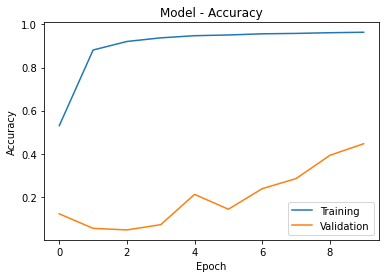

In [17]:
# Accuracy
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

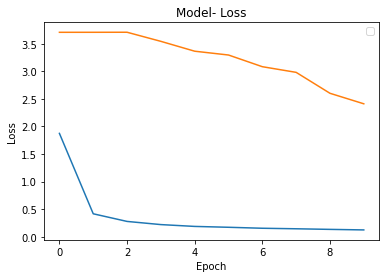

In [18]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Model Testing and Accuracy check


*   model.evaluate()
*   Precision, Recall, F1-score, Support
*   Plot ROC and compare AUC

In [19]:
model.evaluate(X_test, Y_test, batch_size = 400, verbose =1)

19/19 [==============================] - 1s 60ms/step - loss: 2.3966 - accuracy: 0.4553


[2.3965601921081543, 0.45529890060424805]

In [20]:
Y_pred = model.predict(x = X_test, verbose = 1)
Y_score=model.predict(X_test)
print(Y_score)

230/230 [==============================] - 1s 5ms/step
[[1.5494083e-04 2.9862751e-03 5.3953859e-03 ... 4.3368950e-03
  4.4279466e-03 1.4126864e-03]
 [9.1707893e-04 9.9099902e-03 5.8180086e-02 ... 2.6694895e-03
  1.1570796e-03 3.6226234e-03]
 [2.3590789e-04 7.9726735e-03 1.4418396e-02 ... 1.5138598e-03
  6.0277910e-04 1.8271052e-03]
 ...
 [8.6591934e-04 7.7214586e-03 1.0065340e-02 ... 2.6149873e-03
  2.5466641e-03 5.6044273e-03]
 [6.3865387e-04 1.0352338e-02 1.6190886e-02 ... 4.1787056e-03
  8.4174192e-03 7.3749111e-03]
 [3.5570833e-04 3.8513050e-03 1.3526330e-02 ... 2.2959174e-01
  1.1322803e-02 1.0898731e-02]]


In [21]:
n_classes=47
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [22]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  del sys.path[0]


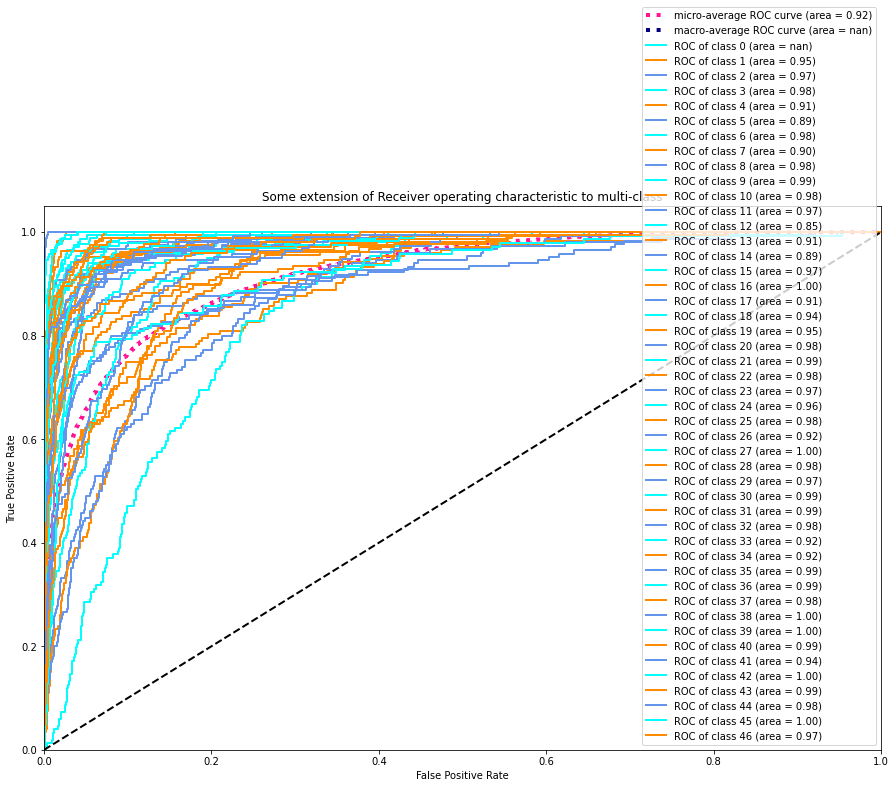

In [23]:
# Plot all ROC curves
lw=2
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
figure = plt.gcf()  # get current figure
figure.set_size_inches(15,10)
plt.show()

In [26]:
Y_pred = np.argmax(Y_pred, axis = 1)
print(Y_pred.shape)
Y_test = np.argmax(Y_test, axis = 1)
print(Y_test.shape)

(7360,)
(7360,)


In [28]:
print("Classification report for the model %s:\n%s\n" % (model, metrics.classification_report(Y_test, Y_pred)))

Classification report for the model <tensorflow.python.keras.engine.functional.Functional object at 0x7f66059db6d8>:
              precision    recall  f1-score   support

           1       0.98      0.26      0.41       161
           2       0.75      0.53      0.62       167
           3       0.87      0.77      0.82       146
           4       0.74      0.10      0.17       172
           5       0.80      0.03      0.05       151
           6       1.00      0.40      0.57       162
           7       0.72      0.16      0.26       162
           8       0.82      0.55      0.66       184
           9       1.00      0.03      0.07       173
          10       0.73      0.45      0.55       168
          11       0.86      0.04      0.07       159
          12       0.00      0.00      0.00       151
          13       0.50      0.03      0.06       146
          14       1.00      0.01      0.01       154
          15       0.64      0.37      0.47       150
          16      